(1112, 1112)
(1400, 1603)


True

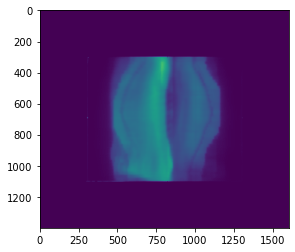

In [6]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pydicom as dicom
import cv2

fixed_image = dicom.dcmread('piramide.dcm')
moving_image = dicom.dcmread('MapaMama.dcm')

fixed_matrix, moving_matrix = fixed_image.pixel_array, moving_image.pixel_array
#fixed_matrix, moving_matrix = sitk.GetArrayFromImage(fixed_image), sitk.GetArrayFromImage(moving_image_or)
size_fixed = np.shape(fixed_matrix)
size_moving = np.shape(moving_matrix)
padding = 300


new_fixed_matrix = np.zeros((size_fixed[0]+2*padding,size_fixed[1]+2*padding))
new_fixed_matrix[padding:padding + size_fixed[0], padding:padding + size_fixed[1]] = fixed_matrix

new_moving_matrix = np.zeros((size_moving[0]+2*padding,size_moving[1]+2*padding))
new_moving_matrix[padding:padding + size_moving[0], padding:padding + size_moving[1]] = moving_matrix

new_fixed_matrix = 255 * new_fixed_matrix / new_fixed_matrix.max()
new_moving_matrix = 255 * new_moving_matrix / new_moving_matrix.max()

#plt.imshow(fixed_matrix)
#plt.clf()
plt.imshow(new_moving_matrix)
print(np.shape(new_fixed_matrix))
print(np.shape(new_moving_matrix))

cv2.imwrite("mama_fixed.png", new_fixed_matrix)
cv2.imwrite("mama_moving.png", new_moving_matrix)

